# Expresso Churn Prediction Challenge


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parsing DataFrame

In [3]:
# Create Cilent df
client_df = pd.read_csv("/content/drive/MyDrive/Copy of Expresso_churn_dataset.csv")

client_df

# Create variable definition DataFrame
# variable_df = pd.read_csv("VariableDefinitions.csv")

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [ ]:
variable_df

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [4]:
# View head
client_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [5]:
#Checking for Null values
client_df.isnull().mean()* 100

,0
user_id,0.000000
REGION,39.428044
TENURE,0.000000
MONTANT,35.131018
FREQUENCE_RECH,35.131018
REVENUE,33.706213
ARPU_SEGMENT,33.706213
FREQUENCE,33.706213
DATA_VOLUME,49.229776
ON_NET,36.520774


CHURN
0    1750062
1     403986
Name: count, dtype: int64


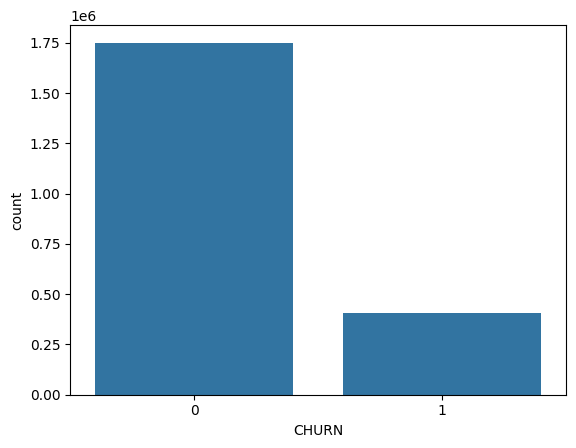

In [6]:
sns.countplot(client_df, x="CHURN")
print(client_df["CHURN"].value_counts())
plt.show()

In [7]:
#Checking for the number of rows where the CHURN is not null
client_df[~client_df.isnull().any(axis=1)]['CHURN'].value_counts()

,count
CHURN,
0,10823
1,16


In [ ]:
#Checing for the rows where the CHURN have nulls in them
client_df[client_df.isnull().any(axis=1)]['CHURN'].value_counts()

,count
CHURN,
0,1739239
1,403970


In [ ]:
#Checking for the number of rows that is rows and columns that has null in them
client_df[client_df.isnull().any(axis=1)].shape

(2143209, 19)

In [ ]:
#Checking for the unique values in TENURE
client_df["TENURE"].unique()

array(['K > 24 month', 'I 18-21 month', 'G 12-15 month', 'H 15-18 month',
       'J 21-24 month', 'F 9-12 month', 'D 3-6 month', 'E 6-9 month'],
      dtype=object)

In [ ]:
df_copy = client_df.copy()
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
#Initializing
encoder = LabelEncoder()
#Using the encoder on the tenure column
client_df["TENURE"] = encoder.fit_transform(client_df["TENURE"])

In [ ]:
#Checking for the unique values in REGION
client_df["REGION"].unique()
#Filling the null values in region
client_df["REGION"]= client_df["REGION"].fillna("No Region")

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [ ]:
#Droping the unnecessary colmuns
client_df.drop(columns = ["user_id", "MRG"], axis= 1 , inplace= True)
client_df.drop(columns = ["ZONE1", "ZONE2"], axis= 1 , inplace= True)

In [ ]:
#Encoding the TOP PACK column
top_pack_encoder = LabelEncoder()

client_df["TOP_PACK"] = top_pack_encoder.fit_transform(client_df["TOP_PACK"])

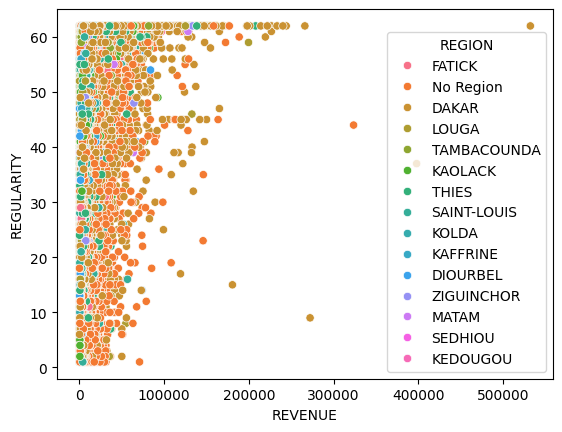

In [ ]:
#Visualization of the dataframe using the variables: Revenue, Regularity and Region as the colour
sns.scatterplot(client_df, x = "REVENUE" , y = "REGULARITY", hue = "REGION")
plt.show()

In [ ]:
#Getting dummy values for the categorical columns
dummy_df = pd.get_dummies(client_df, dtype= "int")
dummy_df.head(5)

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_No Region,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,7,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,7,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,...,0,0,0,0,1,0,0,0,0,0
3,7,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,7,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking for where the ORANGE is null. in order to check if there's any form of correlation between the columns
dummy_df[["ORANGE","TIGO" ]].loc[dummy_df["ORANGE"].isnull()]

,ORANGE,TIGO
1,NaN,NaN
6,NaN,NaN
10,NaN,NaN
12,NaN,NaN
13,NaN,NaN
...,...,...
2154034,NaN,NaN
2154041,NaN,NaN
2154043,NaN,NaN
2154045,NaN,NaN


In [ ]:
#dropping the columns  because calling orange or tigo doesn't matter
dummy_df.drop(columns = ["ORANGE", "TIGO"], axis = 1, inplace = True)

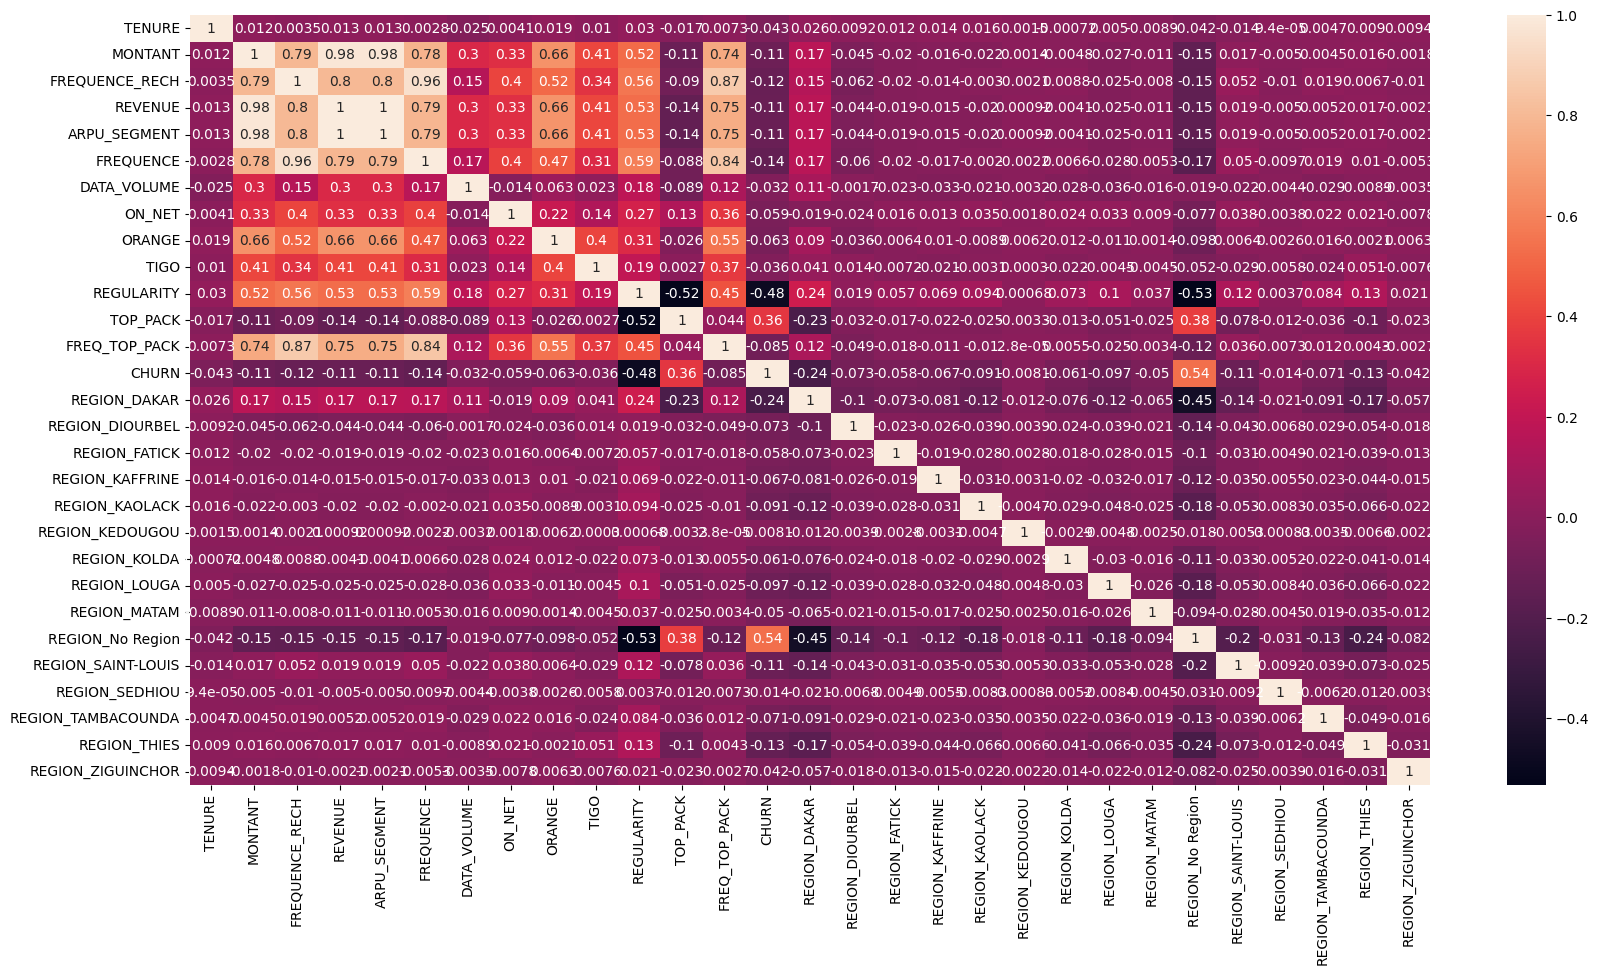

In [ ]:
#Visualization of correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dummy_df.corr(), annot= True)["CHURN"]
plt.show()

In [ ]:
#Storing the correlation df into a variable
corr_matrix = dummy_df.corr()

In [ ]:
#Storing the absolute values of CHURN column with other columns
corr_table = abs(corr_matrix["CHURN"]).sort_values(ascending=False)

In [ ]:
#Dropping the CHURN row (because of the you don't need the correlation with itself)
corr_table.drop(index = "CHURN", inplace = True )

In [ ]:
#saving the columns of the corr_table that are greater than 0.1 i.e columns that can be said to be significant in this dataset.
pred_colums = corr_table.loc[corr_table > 0.1].index

In [ ]:
#Defining you X and y variables
x = dummy_df[pred_colums]

y = dummy_df["CHURN"]

<Axes: >

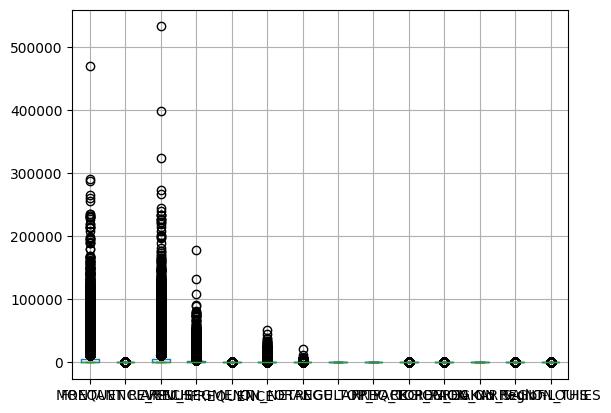

In [ ]:
#Checking for outliers in the Independent Variable
x.boxplot()
plt.show()

In [ ]:
#Dealing with outliers
#Import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

#Initialization
scaler = QuantileTransformer()

x_scaled = scaler.fit_transform(x)

In [ ]:
#Counting the number of O and 1 in the dataframe
y.value_counts()/y.shape[0]*100

,count
CHURN,
0,81.245265
1,18.754735


In [ ]:
#Filling the NaN values
for cols in dummy_df.select_dtypes("number").columns:
  dummy_df[cols]= dummy_df[cols].fillna(0)

In [ ]:
#Checking for the correlation after the data has been scaled and NaN values are treated
new_corr_matrix = dummy_df.corr()

In [ ]:
#Getting the absolute correlation values  i.e ignoring the negative signs first in order to know the significance of each columns
corr_table = abs(new_corr_matrix["CHURN"])

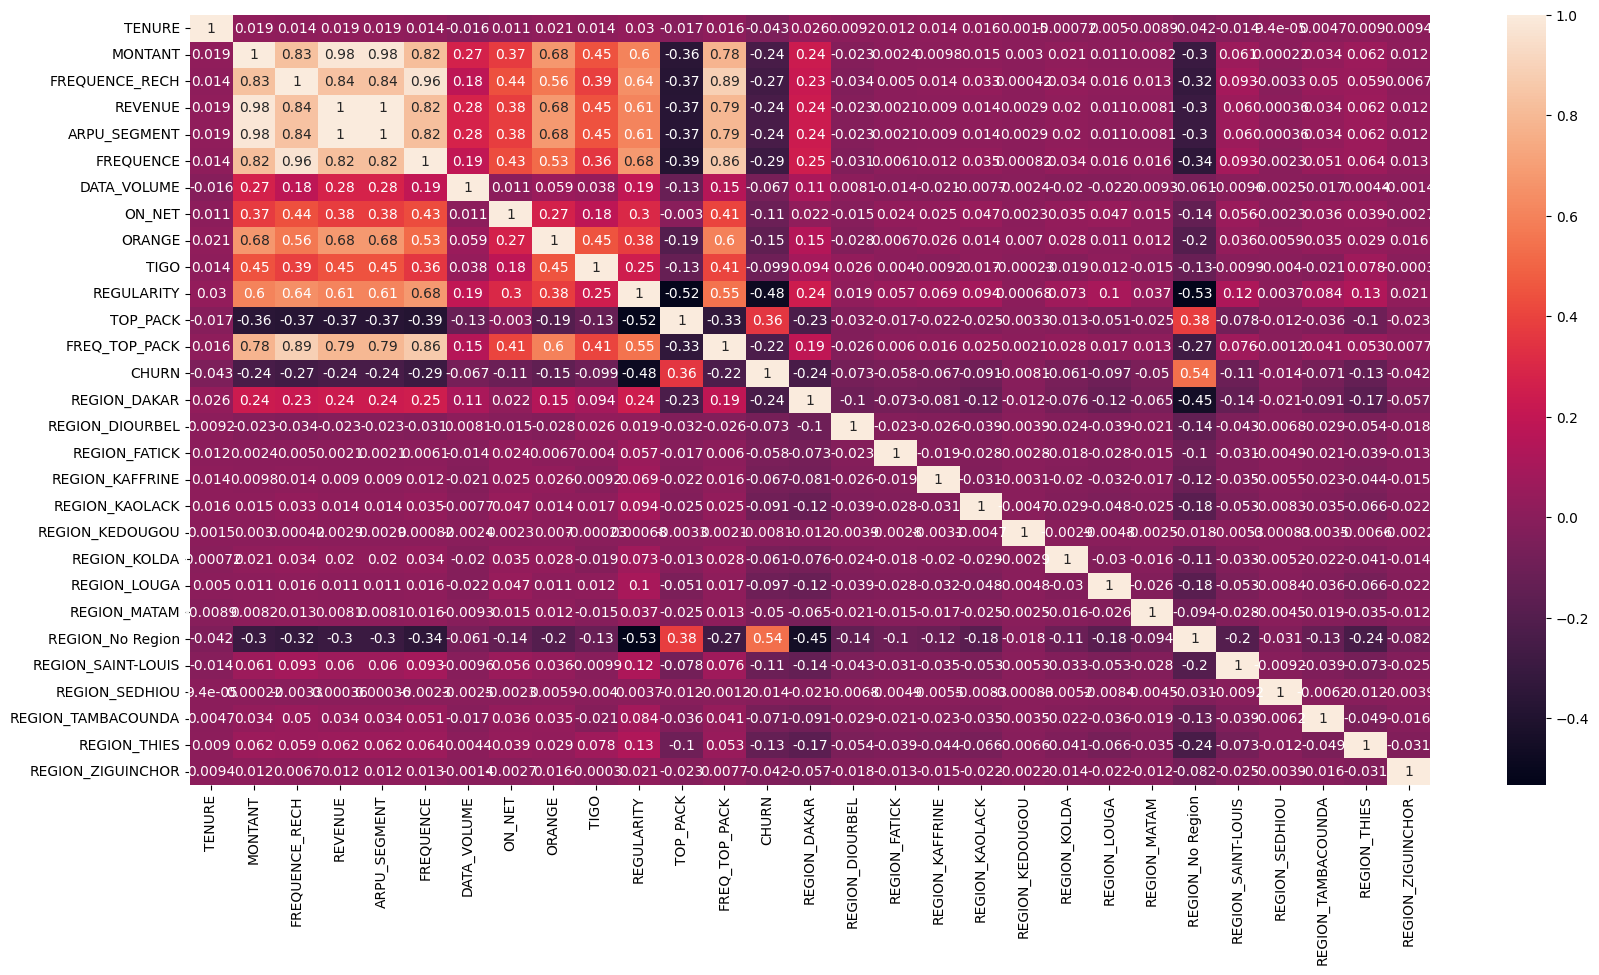

In [ ]:
#Visualizing the new are worked one dataframe
plt.figure(figsize=(20,10))
sns.heatmap(dummy_df.corr(), annot= True)
plt.show()

### MODEL PHASE

In [ ]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

test_preds = log_reg.predict(X_test)

print(classification_report(y_test, test_preds))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rdf = RandomForestClassifier()

rdf.fit(X_train, y_train)

test_preds = rdf.predict(X_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92    350013
           1       0.67      0.67      0.67     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.80      0.80    430810
weighted avg       0.88      0.88      0.88    430810



In [ ]:
train_preds = rdf.predict(X_train)

print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94   1400049
           1       0.72      0.77      0.74    323189

    accuracy                           0.90   1723238
   macro avg       0.83      0.85      0.84   1723238
weighted avg       0.90      0.90      0.90   1723238



In [ ]:
pd.DataFrame(rdf.feature_importances_, index=x.columns, columns=["Importances"]).sort_values(by="Importances", ascending=False)

,Importances
REGULARITY,0.288456
REGION_No Region,0.245596
REVENUE,0.157253
ARPU_SEGMENT,0.087532
FREQUENCE,0.059931
FREQUENCE_RECH,0.051602
MONTANT,0.044715
TOP_PACK,0.033152
REGION_DAKAR,0.020700
REGION_THIES,0.007196


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)


train_preds = dec_tree.predict(X_train)
print(classification_report(y_train, train_preds))


test_preds = dec_tree.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94   1400049
           1       0.72      0.76      0.74    323189

    accuracy                           0.90   1723238
   macro avg       0.83      0.85      0.84   1723238
weighted avg       0.90      0.90      0.90   1723238

              precision    recall  f1-score   support

           0       0.92      0.91      0.92    350013
           1       0.63      0.68      0.65     80797

    accuracy                           0.87    430810
   macro avg       0.78      0.79      0.79    430810
weighted avg       0.87      0.87      0.87    430810

